# Housing Sale Analysis
__By: Brian Lee__

************


## Business Problem

A King County real estate agency has requested us for help in predicting housing prices. They would like to figure out which factors have the greatest effect on the price of the home. You must then translate those findings into actionable insights that the real estate agency can use to better sell the homes in the market.

## Data Understanding

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this repo. The description of the column names can be found in column_names.md in the same folder.

In [15]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

Let's first load the housing data set into a DataFrame

In [28]:
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


The dataset columns are defined below:

* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  of Bedrooms/House
* **bathrooms** -  of bathrooms/bedrooms
* **sqft_living** -  footage of the home
* **sqft_lot** -  footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## Data Preparation

We need to first clean up the dataset so that we can properly analyze the housing price factors.

****

Lets take a quick look at the data we are given:

In [29]:
display(data.info())
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

None

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


There seems to be too many columns. Let's specify what columns we need for our analysis

Removing the following:

- date
- view
- sqft_above
- sqft_basement
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15

In [30]:
# Dropping extraneous columns
data.drop(columns=['id','date','view','sqft_above','sqft_basement','zipcode','lat','long','sqft_living15','sqft_lot15'], inplace=True)

We need to find missing values and replace them with appropriate values:

In [31]:
# Find missing value columns
data.isna().sum()

price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront      2376
condition          0
grade              0
yr_built           0
yr_renovated    3842
dtype: int64

In [32]:
# Analyze for replacements for 'waterfront' and 'yr_renovated'
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,17755.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676,83.636778
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234,399.946414
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,2015.000000


We can see that waterfront and yr_renovated are missing values. We should feel comfortable with replacing the values with the median values of 0 for both seeing that both the median and 25/75 quartiles all equate to 0.

In [33]:
for col in data.columns:
    try:
        median = data[col].median()
        data[col] = data[col].fillna(value=median)
    except:
        continue
        
# Rechecking missing values and confirm none left.        
data.isna().sum()

price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
condition       0
grade           0
yr_built        0
yr_renovated    0
dtype: int64

Taking a look at __'yr_renovated'__, we can see that rather than needing to see the specific year of renovation, it may be more effective to see this as a "renovated" category. 

In [34]:
# Converting yr_renovated into renovated 
data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x>0 else x)

In [35]:
# Dropping original column yr_renovated
data.drop(columns=['yr_renovated'], inplace=True)

In [37]:
# Taking a look at the cleaned data
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1.0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0


## Exploratory Data Analysis

Now that we have cleaned the data, let's examine the distributitions of the columns and examine the descriptive statisitics for the dataset

Lets do a basic plot to see trends to the sale price of the home to the columns

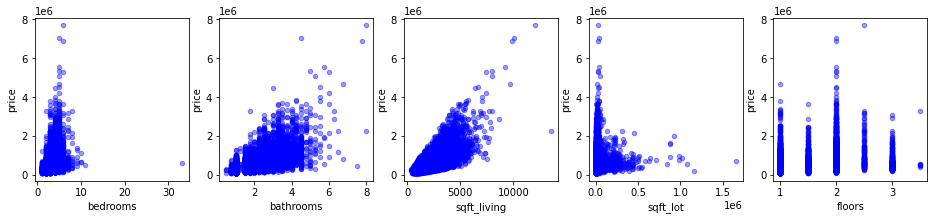

In [38]:
# Creates subplots comparing price and each column
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['bedrooms','bathrooms','sqft_living','sqft_lot','floors'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

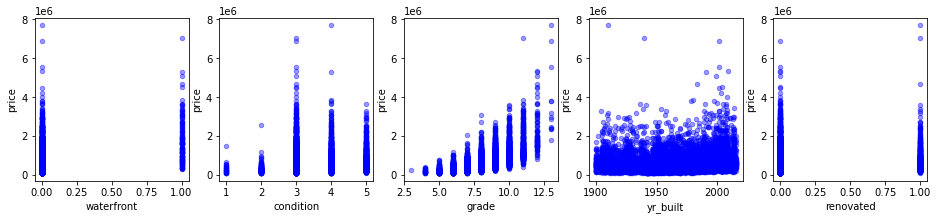

In [40]:
# Creates subplots comparing price and each column
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['waterfront','condition','grade','yr_built','renovated'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

We can see there are some columns that appear to be categorical at first glance.
- floors
- waterfront
- condition
- grade
- renovated

There may be a few outliers in the dataset as well, in particular __'bedrooms'__

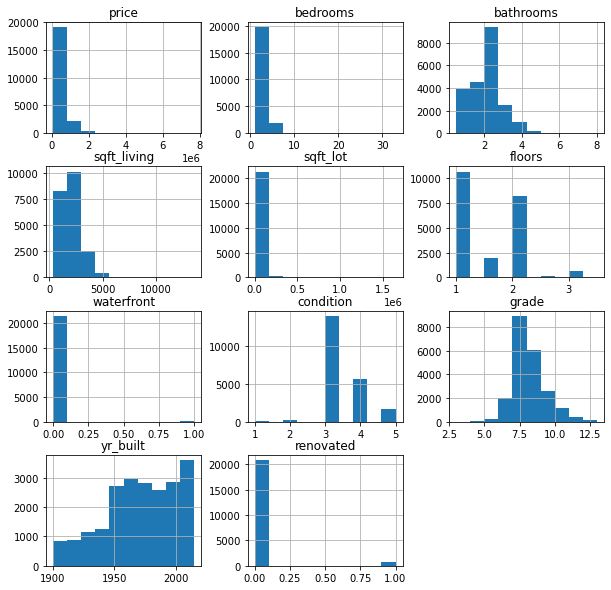

In [43]:
# Creates a histogram for each variable
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data.hist(ax = ax);

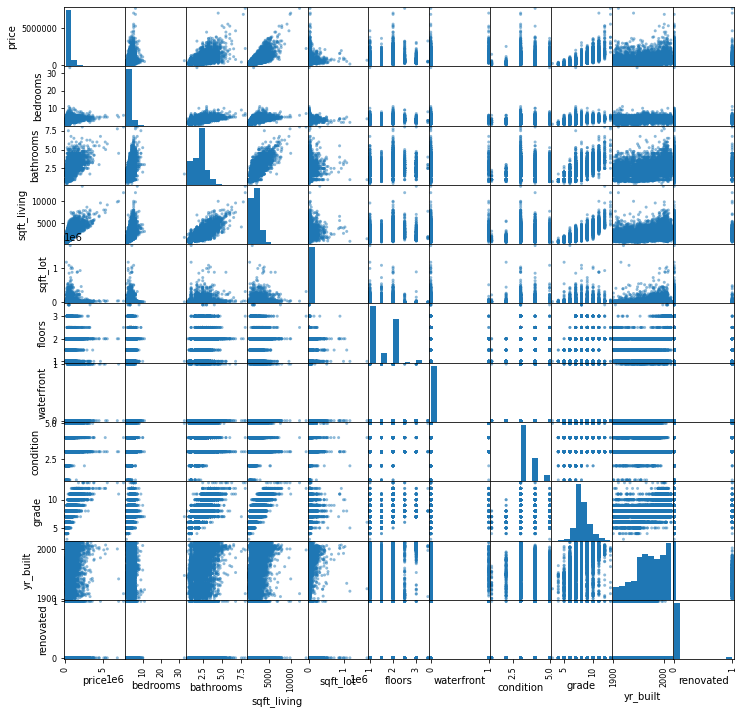

In [42]:
# Creates a scatter matrix
pd.plotting.scatter_matrix(data, figsize=[12,12]);
plt.show()

Let's check for __Linearity__

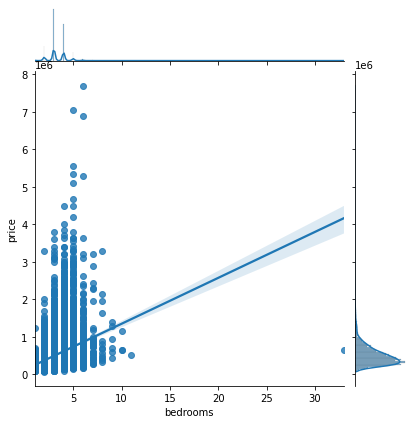

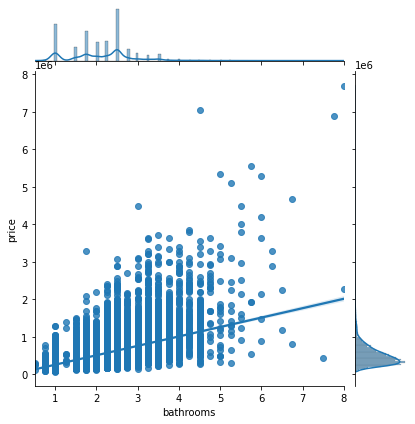

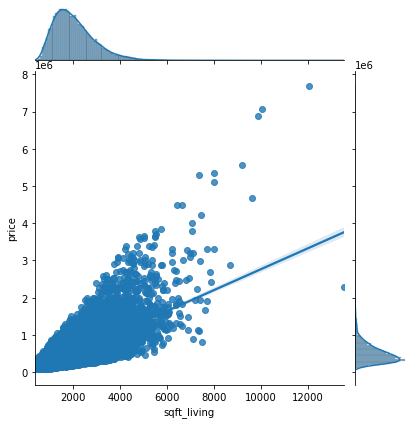

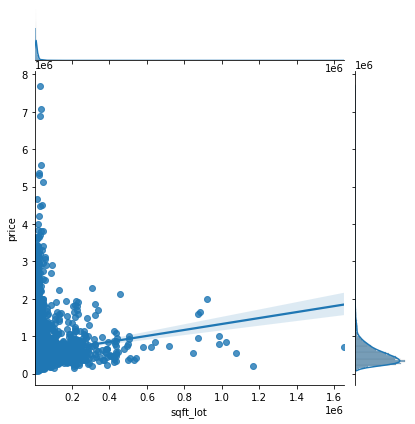

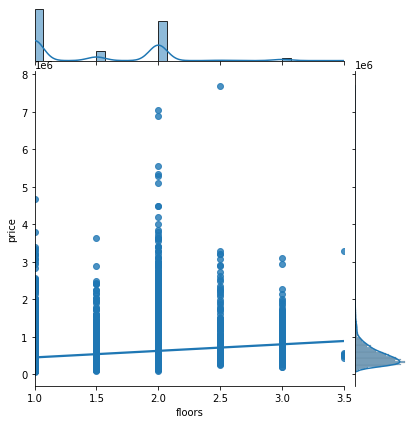

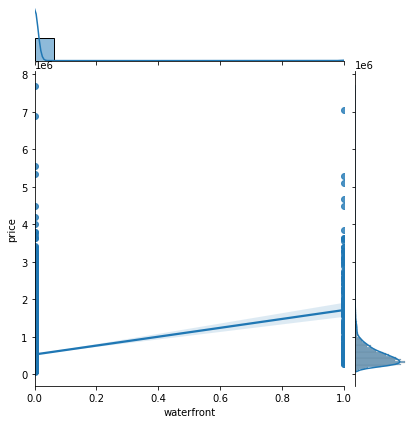

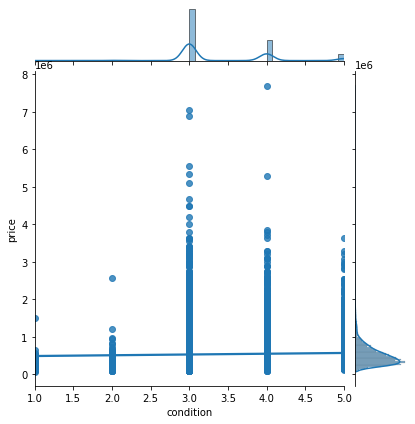

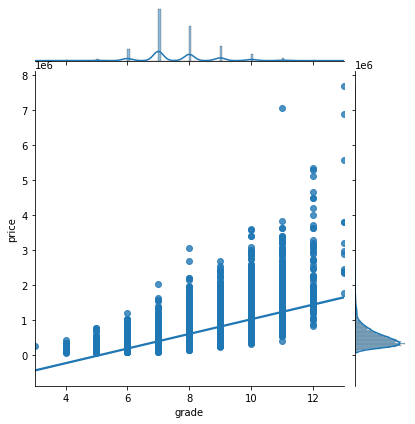

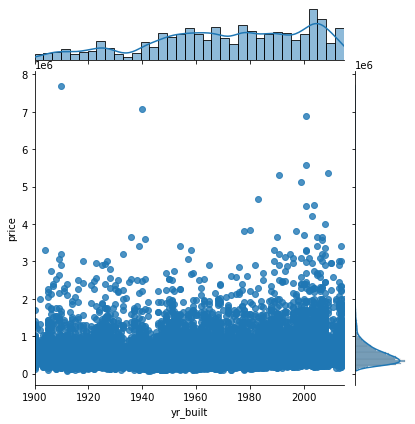

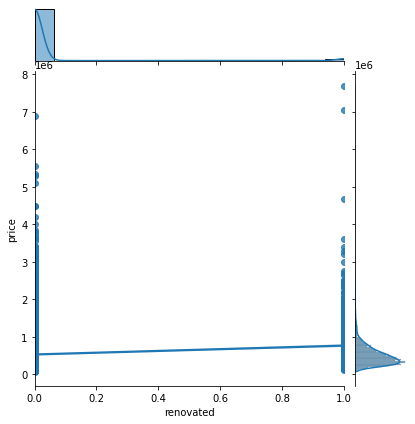

In [51]:
for col in data.columns[1:]:
    sns.jointplot(x=col, y='price', data=data, kind='reg');

* The non-categorical factors appear to be relatively linear

Let's check for __Multicollinearity__.

In [44]:
# Displays if correlation coefficient values is greater than 0.75
data.corr()
abs(data.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,renovated
price,True,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False
grade,False,False,False,True,False,False,False,False,True,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False


In [45]:
# Finds which column pairs have a CC values > 0.75
df_mc = data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_mc['pairs'] = list(zip(df_mc.level_0, df_mc.level_1))

df_mc.set_index(['pairs'], inplace = True)

df_mc.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_mc.columns = ['cc']

df_mc.drop_duplicates(inplace=True)

df_mc[(df_mc.cc>.75) & (df_mc.cc<1)]

,cc
pairs,
"(grade, sqft_living)",0.762779
"(sqft_living, bathrooms)",0.755758


The correlation table tells us that it may be better to drop __sqft_living__ as it is highly correlated with other variables.

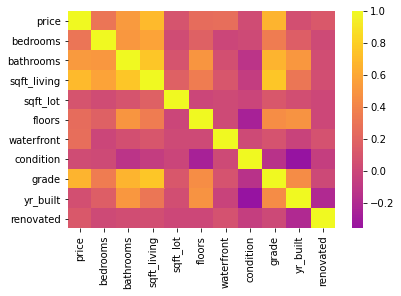

In [50]:
# Heatmap for correlation values
import seaborn as sns
sns.heatmap(data.corr(), cmap='plasma', center=0);

## Modeling

Finally, you'll create a definitive model. This will include fitting an initial regression model, and then conducting statistical analyses of the results. You'll take a look at the p-values of the various features and perform some feature selection. You'll test for regression assumptions including normality, heteroscedasticity, and independence. From these tests, you'll then refine a

### Model 1

Let's model for a non-editted dataset

In [147]:
#Bring in a clean copy of dataset
data_1 = data

In [148]:
# Define the problem
outcome = 'price'
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',\
          'condition','grade','yr_built','yr_renovated']

In [149]:
# Brief preprocessing --- not sure if this stays (z-score)
data_1.columns = [col.replace(' ', '_') for col in data_1.columns]
for col in x_cols:
    data_1[col] = (data_1[col] - data_1[col].mean())/data_1[col].std()
data_1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
0,10/13/2014,221900.0,-0.411263,-1.451035,-0.980636,-0.228182,-0.915570,-0.0825,-0.629931,-0.560804,-0.544699,-0.188881
1,12/9/2014,538000.0,-0.411263,0.174457,0.533324,-0.189741,0.937363,-0.0825,-0.629931,-0.560804,-0.680867,5.280213
2,2/25/2015,180000.0,-1.517318,-1.451035,-1.427199,-0.123144,-0.915570,-0.0825,-0.629931,-1.413161,-1.293624,-0.188881
3,12/9/2014,604000.0,0.694793,1.149752,-0.131075,-0.243877,-0.915570,-0.0825,2.444765,-0.560804,-0.204279,-0.188881
4,2/18/2015,510000.0,-0.411263,-0.150642,-0.436046,-0.169506,-0.915570,-0.0825,-0.629931,0.291552,0.544646,-0.188881


In [150]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3949.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:50:55   Log-Likelihood:            -2.9615e+05
No. Observations:               21596   AIC:                         5.923e+05
Df Residuals:                   21585   BIC:                         5.924e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.403e+05   1486.501    363.466      0.000    5.37e+05    5.43e+05
bedrooms     -4.199e+04   1929.046    -21.766      0.000   -4.58e+04   -3.82e+04
bathrooms     3.895e+04   2678.002     14.546      0.000    3.37e+04    4.42e+04
sqft_living    1.65e+05   3047.046     54.162      0.000    1.59e+05    1.71e+05
sqft_lot     -1.032e+04   1521.803     -6.783      0.000   -1.33e+04   -7339.998
floors        1.099e+04   1866.330      5.890      0.000    7334.397    1.47e+04
waterfront    6.138e+04   1505.278     40.778      0.000    5.84e+04    6.43e+04
condition     1.311e+04   1634.506      8.020      0.000    9904.424    1.63e+04
grade         1.516e+05   2529.545     59.941      0.000    1.47e+05    1.57e+05
yr_built     -1.111e+05   2049.717    -54.221      0.000   -1.15e+05   -1.07e+05
yr_renovated  5138.4485   1566.965      3.279      0.001    2067.080    8209.817
==============================================================================
Omnibus:                    15752.063   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           990409.617
Skew:                           2.912   Prob(JB):                         0.00
Kurtosis:                      35.661   Cond. No.                         4.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model 1 Training model

In [169]:
#Bring in a clean copy of dataset
data_1 = data

In [170]:
# Define the problem
outcome = 'price'
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront',\
          'condition','grade','yr_built','yr_renovated']

In [171]:
train, test = train_test_split(data_1)

In [172]:
# Brief pre-processing
for col in x_cols:
    train[col] = (train[col] - train[col].mean())/train[col].std()
train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
648,11/18/2014,157000.0,-2.615162,-1.457016,-1.319160,0.260146,-0.914999,-0.079997,-0.634124,-1.413272,-1.091888,-0.185879
14844,5/16/2014,540000.0,-2.615162,-1.457016,-1.023811,-0.197135,0.010167,-0.079997,-0.634124,-0.559330,-1.738292,-0.185879
8846,9/3/2014,539000.0,-0.412183,-0.151240,0.299790,4.518452,-0.914999,-0.079997,-0.634124,-0.559330,0.745261,-0.185879
5222,5/23/2014,383000.0,-0.412183,-1.457016,-0.301847,-0.222485,-0.914999,-0.079997,0.899992,-0.559330,-0.989824,-0.185879
3689,7/2/2014,659000.0,0.689307,-0.151240,0.015380,-0.101606,-0.914999,-0.079997,0.899992,-0.559330,-0.683633,-0.185879


In [173]:
print(len(train), len(test))
train.head()

16197 5399


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
648,11/18/2014,157000.0,-2.615162,-1.457016,-1.319160,0.260146,-0.914999,-0.079997,-0.634124,-1.413272,-1.091888,-0.185879
14844,5/16/2014,540000.0,-2.615162,-1.457016,-1.023811,-0.197135,0.010167,-0.079997,-0.634124,-0.559330,-1.738292,-0.185879
8846,9/3/2014,539000.0,-0.412183,-0.151240,0.299790,4.518452,-0.914999,-0.079997,-0.634124,-0.559330,0.745261,-0.185879
5222,5/23/2014,383000.0,-0.412183,-1.457016,-0.301847,-0.222485,-0.914999,-0.079997,0.899992,-0.559330,-0.989824,-0.185879
3689,7/2/2014,659000.0,0.689307,-0.151240,0.015380,-0.101606,-0.914999,-0.079997,0.899992,-0.559330,-0.683633,-0.185879


In [174]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     3008.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:57:34   Log-Likelihood:            -2.2161e+05
No. Observations:               16197   AIC:                         4.432e+05
Df Residuals:                   16186   BIC:                         4.433e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.394e+05   1664.780    324.025      0.000    5.36e+05    5.43e+05
bedrooms     -3.878e+04   2163.524    -17.926      0.000    -4.3e+04   -3.45e+04
bathrooms     3.755e+04   3003.497     12.503      0.000    3.17e+04    4.34e+04
sqft_living    1.57e+05   3403.102     46.148      0.000     1.5e+05    1.64e+05
sqft_lot     -8286.2649   1704.996     -4.860      0.000   -1.16e+04   -4944.284
floors        1.096e+04   2108.912      5.198      0.000    6828.353    1.51e+04
waterfront    5.559e+04   1682.767     33.038      0.000    5.23e+04    5.89e+04
condition     1.292e+04   1835.489      7.039      0.000    9322.842    1.65e+04
grade         1.546e+05   2834.731     54.555      0.000    1.49e+05     1.6e+05
yr_built     -1.105e+05   2302.491    -48.013      0.000   -1.15e+05   -1.06e+05
yr_renovated  5988.0813   1749.056      3.424      0.001    2559.739    9416.424
==============================================================================
Omnibus:                    10175.013   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           381539.685
Skew:                           2.459   Prob(JB):                         0.00
Kurtosis:                      26.263   Cond. No.                         4.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The first model has R-squared of 0.650, which means that 65% of housing sale prices values is dependent on the various columns of the data set (bedrooms, bathrooms, etc...)

The p-values for the variables are all below 0.05; thus, the variables are statistically significant

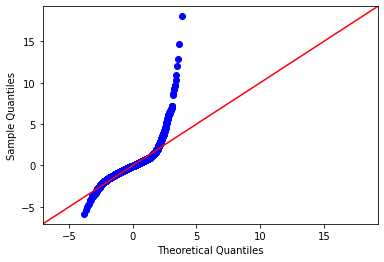

In [175]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

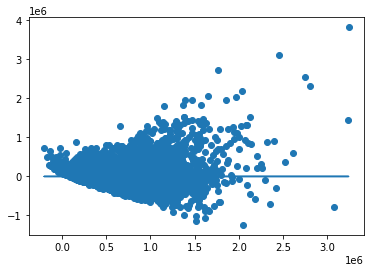

In [176]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

### Model 2

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data_1[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bedrooms', 1.683973020461872),
 ('bathrooms', 3.245425595801063),
 ('sqft_living', 4.201533413342305),
 ('sqft_lot', 1.0480124935690076),
 ('floors', 1.5762557564141033),
 ('waterfront', 1.0253765104936816),
 ('condition', 1.208989925452623),
 ('grade', 2.895574243626756),
 ('yr_built', 1.9012435801972836),
 ('yr_renovated', 1.1111395498943004)]

Let's take out __sqft_living__ as it has the moderate multicollinearity between variables shown through the variance inflation factor and the heatmap done previously

In [178]:
# Removing sqft_living
outcome = 'price'
x_cols = ['bedrooms','bathrooms','sqft_lot','floors','waterfront',\
          'condition','grade','yr_built','yr_renovated']

In [179]:
# Training
train, test = train_test_split(data_1)

print(len(train), len(test))
train.head()

16197 5399


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
13699,5/6/2015,700000.0,0.694793,0.499555,0.446190,-0.178826,0.937363,-0.0825,-0.629931,0.291552,0.544646,-0.188881
3648,4/21/2015,695000.0,1.800849,-0.150642,1.175940,-0.268266,0.010897,-0.0825,-0.629931,-0.560804,-1.634044,-0.188881
8932,8/17/2014,855000.0,0.694793,0.499555,0.794728,0.892514,0.010897,-0.0825,0.907417,1.143908,0.578688,-0.188881
1108,3/6/2015,367000.0,0.694793,0.499555,0.958104,-0.214443,0.937363,-0.0825,-0.629931,1.143908,1.191444,-0.188881
1897,1/16/2015,330000.0,0.694793,-0.800838,-0.904393,-0.161779,-0.915570,-0.0825,-0.629931,-0.560804,-0.680867,-0.188881


In [181]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2635.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:58:29   Log-Likelihood:            -2.2309e+05
No. Observations:               16197   AIC:                         4.462e+05
Df Residuals:                   16187   BIC:                         4.463e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.402e+05   1823.367    296.275      0.000    5.37e+05    5.44e+05
bedrooms     -2212.1265   2183.613     -1.013      0.311   -6492.250    2067.997
bathrooms     1.008e+05   2975.028     33.882      0.000     9.5e+04    1.07e+05
sqft_lot      2900.8294   1924.982      1.507      0.132    -872.348    6674.007
floors        1940.5983   2283.215      0.850      0.395   -2534.755    6415.952
waterfront    6.365e+04   1869.099     34.053      0.000       6e+04    6.73e+04
condition     1.279e+04   2007.640      6.371      0.000    8855.573    1.67e+04
grade         2.305e+05   2539.182     90.774      0.000    2.26e+05    2.35e+05
yr_built     -1.276e+05   2488.918    -51.269      0.000   -1.32e+05   -1.23e+05
yr_renovated  4016.7927   1910.375      2.103      0.036     272.247    7761.339
==============================================================================
Omnibus:                    14368.072   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1724258.808
Skew:                           3.767   Prob(JB):                         0.00
Kurtosis:                      52.982   Cond. No.                         3.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

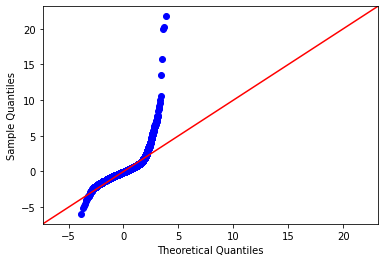

In [182]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

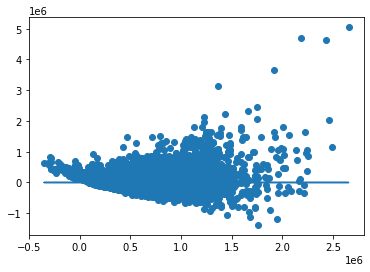

In [183]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>, <AxesSubplot:>]],
      dtype=object)

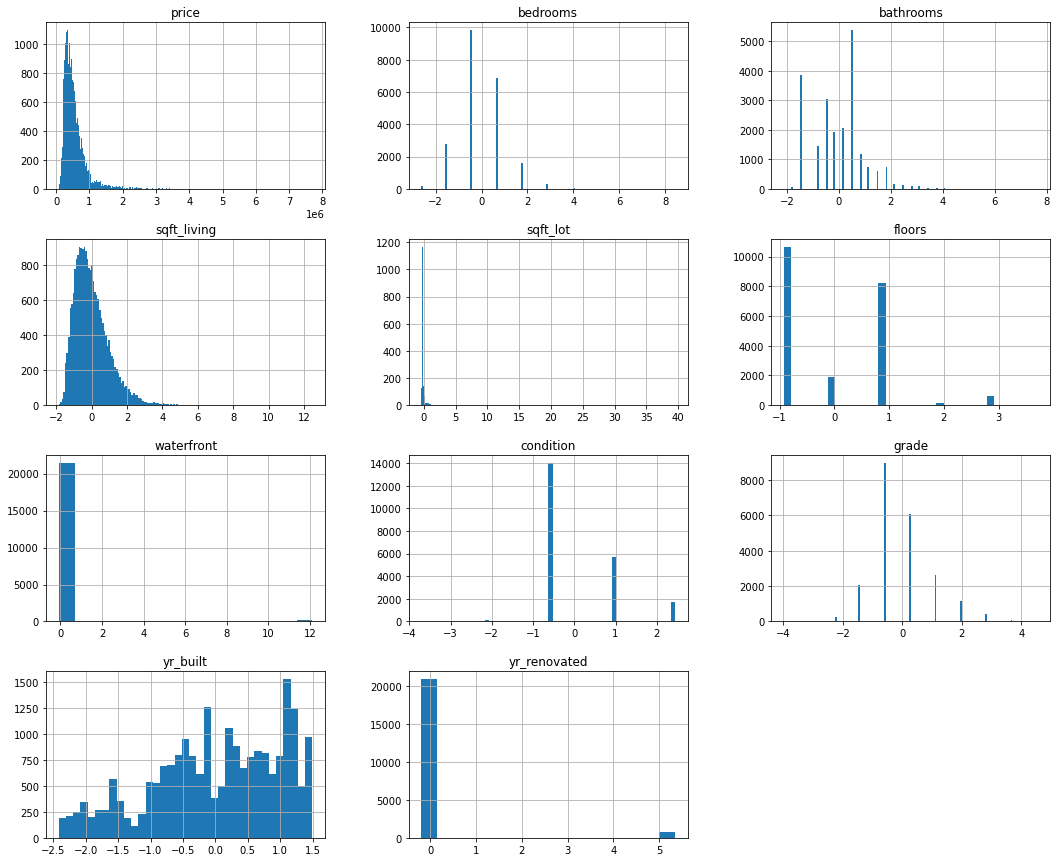

In [142]:
data.hist(figsize=(18,15), bins = 'auto')

-0.188881    20852
 5.343392       73
 5.340645       31
 5.313176       31
 5.324164       30
             ...  
 5.167590        1
 5.162096        1
 5.123640        1
 5.178578        1
 5.156603        1
Name: yr_renovated, Length: 70, dtype: int64

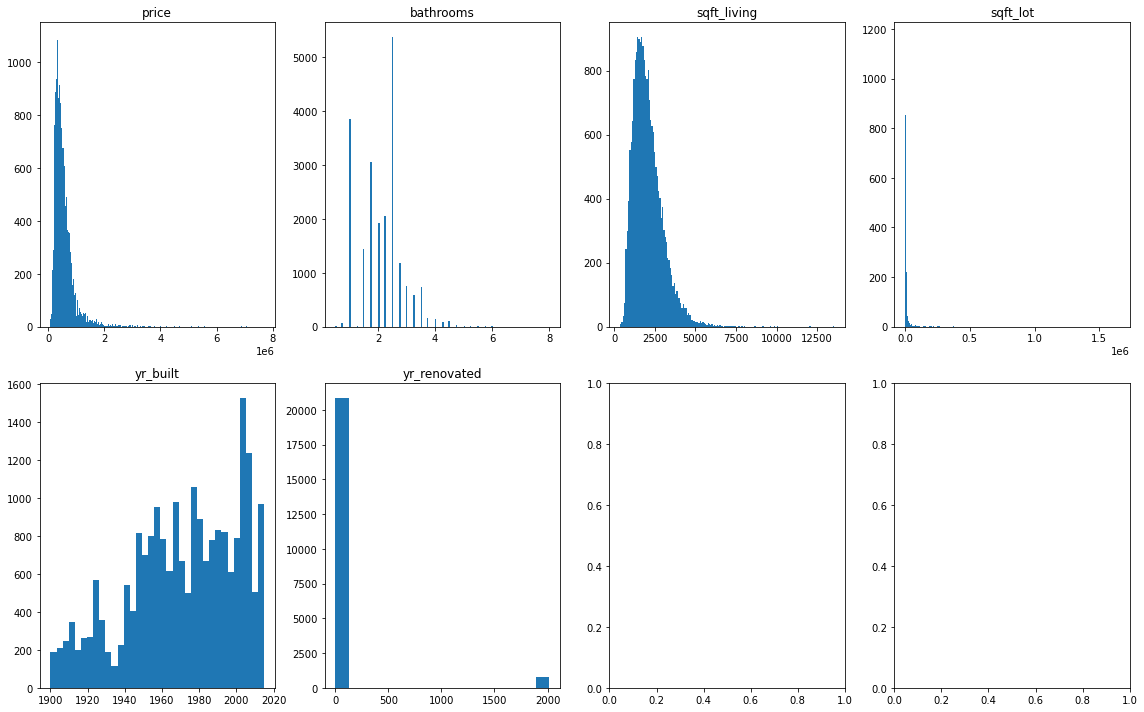

In [30]:
cat_data = data.loc[:, ((data.dtypes != 'object') & (data.nunique() >20))]

fig, axes = plt.subplots(nrows=(cat_data.shape[1] // 3), ncols=4, figsize=(16,10))

categoricals = [column for column in cat_data.columns]

for col, ax in zip(categoricals, axes.flatten()):
    ax.hist(data[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [43]:
continuous = ['price', 'sqft_living', 'sqft_lot', 'yr_built']
data_cont = data[continuous]

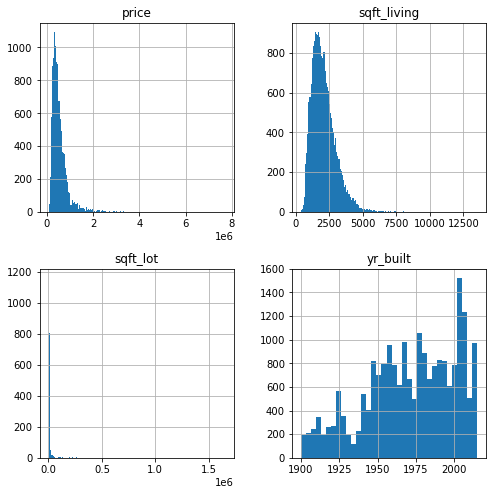

In [44]:
data_cont.hist(figsize  = [8, 8], bins='auto');

Perform log transformations for the variables where it makes sense

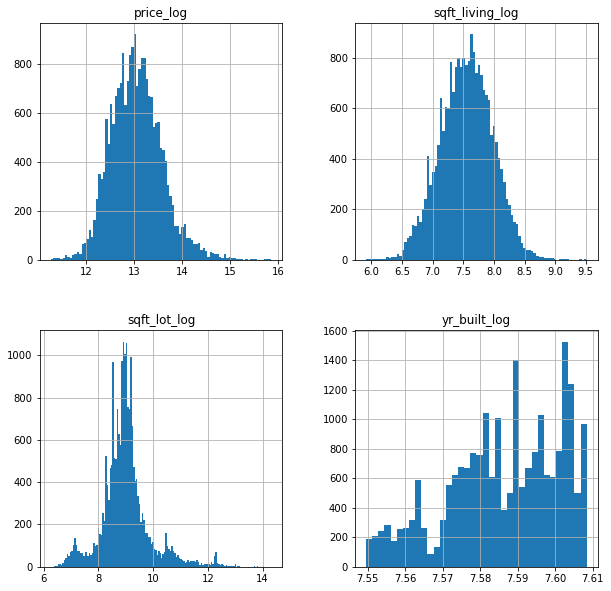

In [45]:
log_names = [f'{column}_log' for column in data_cont.columns]

data_log = np.log(data_cont)
data_log.columns = log_names
data_log.hist(figsize=(10, 10), bins='auto')
fig.tight_layout();

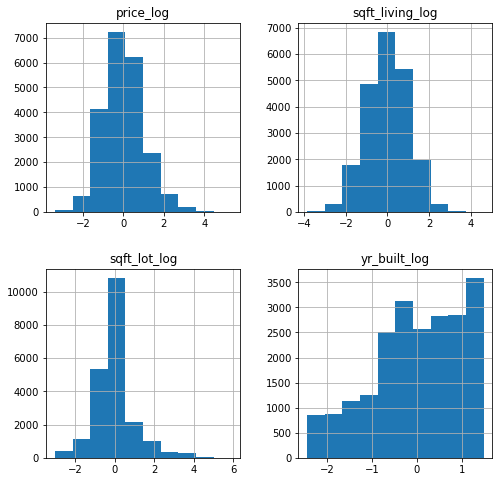

In [38]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = data_log.apply(normalize)

features_final.hist(figsize  = [8, 8]);

Categorical Features

In [49]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built',
       'yr_renovated'],
      dtype='object')

In [50]:
continuous = ['price', 'sqft_living', 'sqft_lot', 'yr_built','yr_renovated']
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade']

In [62]:
# Log transform and normalize
data_cont = data[continuous]

# log features
log_names = [f'{column}_log' for column in data_cont.columns]

data_log = np.log(data_cont)
data_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

data_log_norm = data_log.apply(normalize)

In [80]:
data_ohe = pd.get_dummies(data[categoricals], prefix=categoricals, drop_first=True)
data_ohe

,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,...,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21593,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
21594,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21595,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [75]:
continuous = ['price', 'sqft_living', 'sqft_lot', 'yr_built', 'bathrooms']
categoricals = ['bedrooms', 'floors', 'condition', 'grade']

In [79]:
data['bedrooms'] = data['bedrooms'].apply(str)
data['floors'] = data['floors'].apply(str)
data['condition'] = data['condition'].apply(str)
data['grade'] = data['grade'].apply(str)

In [82]:
preprocessed = pd.concat([data_log_norm, data_ohe], axis=1)
preprocessed.head()

,price_log,sqft_living_log,sqft_lot_log,yr_built_log,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,...,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,-1.401998,-1.125556,-0.388430,-0.537409,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.279938,0.709446,-0.113241,-0.674325,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.799430,-2.131893,0.244475,-1.293945,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.499698,0.070674,-0.523914,-0.196338,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.178434,-0.292725,0.008139,0.547946,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


Run a linear model with SalePrice as the target variable in statsmodels

In [83]:
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

In [84]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1167.
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:43:09   Log-Likelihood:                -19580.
No. Observations:               21597   AIC:                         3.923e+04
Df Residuals:                   21563   BIC:                         3.950e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1318      0.122      9.300      0.000       0.893       1.370
sqft_living_log     0.4524      0.008     55.938      0.000       0.437       0.468
sqft_lot_log       -0.0726      0.005    -14.828      0.000      -0.082      -0.063
yr_built_log       -0.3041      0.006    -52.029      0.000      -0.316      -0.293
bedrooms_10        -0.1634      0.350     -0.467      0.640      -0.849       0.522
bedrooms_11        -0.8917      0.602     -1.482      0.138      -2.071       0.288
bedrooms_2         -0.1221      0.046     -2.678      0.007      -0.211      -0.033
bedrooms_3         -0.3486      0.046     -7.610      0.000      -0.438      -0.259
bedrooms_33         0.3572      0.602      0.594      0.553      -0.822       1.536
bedrooms_4         -0.4159      0.047     -8.840      0.000      -0.508      -0.324
bedrooms_5         -0.3743      0.050     -7.546      0.000      -0.472      -0.277
bedrooms_6         -0.4456      0.060     -7.417      0.000      -0.563      -0.328
bedrooms_7         -0.5268      0.109     -4.843      0.000      -0.740      -0.314
bedrooms_8         -0.2522      0.174     -1.447      0.148      -0.594       0.089
bedrooms_9         -0.4928      0.250     -1.968      0.049      -0.984      -0.002
floors_1.5          0.0464      0.016      2.914      0.004       0.015       0.078
floors_2.0          0.0574      0.012      4.849      0.000       0.034       0.081
floors_2.5          0.1020      0.049      2.091      0.037       0.006       0.198
floors_3.0          0.4054      0.028     14.243      0.000       0.350       0.461
floors_3.5          0.2868      0.229      1.255      0.209      -0.161       0.735
condition_2        -0.0561      0.121     -0.464      0.642      -0.293       0.181
condition_3         0.2220      0.112      1.975      0.048       0.002       0.442
condition_4         0.2673      0.112      2.377      0.017       0.047       0.488
condition_5         0.4025      0.113      3.559      0.000       0.181       0.624
grade_11            0.4418      0.035     12.582      0.000       0.373       0.511
grade_12            0.9732      0.067     14.631      0.000       0.843       1.104
grade_13            1.4636      0.168      8.705      0.000       1.134       1.793
grade_3            -1.7297      0.602     -2.872      0.004      -2.910      -0.549
grade_4            -2.1308      0.121    -17.591      0.000      -2.368      -1.893
grade_5            -2.1414      0.048    -44.465      0.000      -2.236      -2.047
grade_6            -1.8437      0.029    -63.667      0.000      -1.900      -1.787
grade_7            -1.3808      0.023    -60.052      0.000      -1.426      -1.336
grade_8            -0.9307      0.021    -44.136      0.000      -0.972      -0.889
grade_9            -0.4268      0.022    -19.734      0.000

### Run the same model in scikit-learn

In [85]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [86]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [87]:
# coefficients
linreg.coef_

array([ 0.45240862, -0.07261187, -0.30414727, -0.16340557, -0.89170744,
       -0.1221068 , -0.34860645,  0.35716098, -0.4159154 , -0.3743177 ,
       -0.44564487, -0.52677182, -0.25224787, -0.49275997,  0.04639454,
        0.05742172,  0.1019523 ,  0.40542302,  0.28682675, -0.05611535,
        0.22203932,  0.26732933,  0.40254531,  0.44178309,  0.97319995,
        1.46357193, -1.72970607, -2.13079619, -2.14138283, -1.8437332 ,
       -1.38083693, -0.93066878, -0.4267665 ])

In [88]:
# intercept
linreg.intercept_

1.1318065430025026

In [ ]:
# Record your observations on "Goodness of fit" here

# The R-squared value is 0.61 i.e. 61% of the variance in the target variable can be explained by TV spending. 
# The Intercept: A "unit" increase in TV spending is associated with a 0.0475 "unit" 
# increase in Sales or an additional 1,000 spent on TV is associated with an increase in sales of 47.5 

__Obtaining Data__
You'll review SQL and practice importing data from a relational database using the ETL (Extract, Transform and Load) process.

__Scrubbing Data__
From there, you'll practice cleaning data:

* Casting columns to the appropriate data types
* Identifying and dealing with null values appropriately
* Removing columns that aren't required for modeling
* Checking for and dealing with multicollinearity
* Normalizing the data

__Exploring Data__
Once you've the cleaned data, you'll then do some further EDA (Exploratory Data Analysis) to check out the distributions of the various columns, examine the descriptive statistics for the dataset, and to create some initial visualizations to better understand the dataset.

__Modeling Data__
Finally, you'll create a definitive model. This will include fitting an initial regression model, and then conducting statistical analyses of the results. You'll take a look at the p-values of the various features and perform some feature selection. You'll test for regression assumptions including normality, heteroscedasticity, and independence. From these tests, you'll then refine a